# Location vs. Target

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("train.csv")

En este análisis se intentará encontrar la relación entre las location y los target.

In [3]:
len(df) #Cantidad de filas del dataframe

7613

In [4]:
df["location"].count() #Cantidad de filas del dataframe con location

5080

In [5]:
df["location"].count()/len(df)*100 #Porcentaje de filas con location respecto al total

66.72796532247472

In [6]:
df["location"].value_counts() #Cantidad de valores diferentes de location junto con su frecuencia

USA               104
New York           71
United States      50
London             45
Canada             29
                 ... 
La Puente, CA       1
STL ?NOLA           1
music.              1
Espoo, Finland      1
ca(NADA)            1
Name: location, Length: 3341, dtype: int64

In [7]:
df["location"].value_counts().nlargest(20) #Los 20 valores más frecuentes de location

USA                104
New York            71
United States       50
London              45
Canada              29
Nigeria             28
UK                  27
Los Angeles, CA     26
India               24
Mumbai              22
Washington, DC      21
Kenya               20
Worldwide           19
Chicago, IL         18
Australia           18
California          17
California, USA     15
New York, NY        15
Everywhere          15
Florida             14
Name: location, dtype: int64

In [8]:
k1 = df[df["target"]==1]["location"].value_counts() #Cantidad de apariciones de cada location en el target 1
k1

USA                           67
United States                 27
Nigeria                       22
India                         20
Mumbai                        19
                              ..
In my own world!!!             1
Va Beach, Virginia             1
Cumming, GA                    1
ALWAYS DYING NEVER RESTING     1
CAMARILLO, CA                  1
Name: location, Length: 1513, dtype: int64

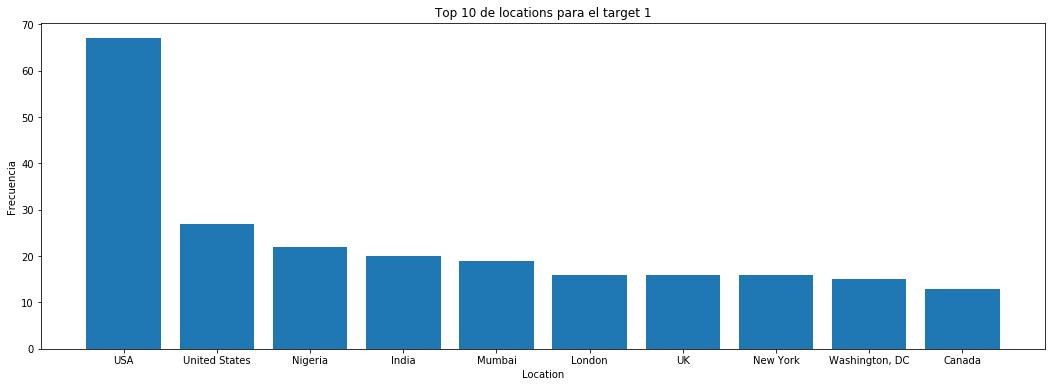

In [9]:
plt.figure(figsize=(18, 6))
plt.bar(k1.iloc[0:10].index, k1.iloc[0:10])
plt.title("Top 10 de locations para el target 1")
plt.xlabel("Location")
plt.ylabel("Frecuencia")
plt.show()

In [10]:
k0 = df[df["target"]==0]["location"].value_counts() #Cantidad de apariciones de cada location en el target 0
k0

New York                     55
USA                          37
London                       29
United States                23
Los Angeles, CA              18
                             ..
God.Family.Money              1
marvel | books | hp | tmr     1
Cuttack, Orissa               1
My old New England home       1
International                 1
Name: location, Length: 2142, dtype: int64

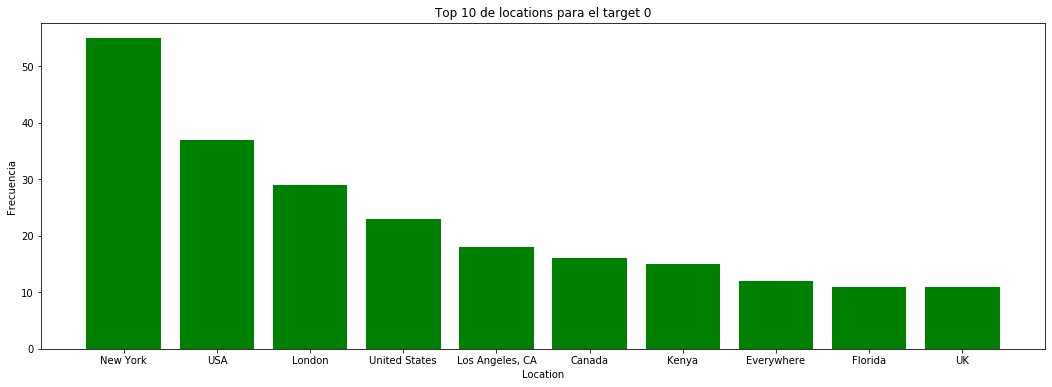

In [11]:
plt.figure(figsize=(18, 6))
plt.bar(k0.iloc[0:10].index, k0.iloc[0:10], color="green")
plt.title("Top 10 de locations para el target 0")
plt.xlabel("Location")
plt.ylabel("Frecuencia")
plt.show()

In [12]:
k1_unique = pd.Series()
for k in k1.index:
    if k not in k0:
        k1_unique = k1_unique.append(pd.Series(index=(k,), data=k1[k]))

In [13]:
k1_unique #Locations que solo aparecen en el target 1

Sacramento                     4
Midwest                        4
Jakarta/Kuala Lumpur/S'pore    4
Nigeria                        4
Portland, Oregon               4
                              ..
Alexandria, Egypt.             1
In my own world!!!             1
Va Beach, Virginia             1
ALWAYS DYING NEVER RESTING     1
CAMARILLO, CA                  1
Length: 1199, dtype: int64

In [14]:
k0_unique = pd.Series()
for k in k0.index:
    if k not in k1:
        k0_unique = k0_unique.append(pd.Series(index=(k,), data=k0[k]))

In [15]:
k0_unique #Locations que solo aparecen en el target 0

304                          9
Pennsylvania, USA            7
Morioh, Japan                6
Leeds, England               5
Wisconsin                    5
                            ..
God.Family.Money             1
marvel | books | hp | tmr    1
Cuttack, Orissa              1
My old New England home      1
International                1
Length: 1828, dtype: int64

Al ver estos datos, nos damos cuenta que el valor que aparece en location no tiene un criterio bien especificado, ya que por ejemplo tenemos valores de Nueva York como clave en minúscula y también en mayúscula y en otros aparece como ciudad, lo que no sirve para identificar si los anteriores se refieren al estado o a la ciudad y por otro lado hay claves con el valor del país, el cual incluye a muchos lugares como el mencionado, y muchos otros valores que solo aparecen una vez y no se pueden identificar como "Loading..." u otros como "Worldwide" no sirven para hacer un análisis sobre este campo y por lo tanto se limita mucho las cosas para lo que se puede usar.